### Problem: 
User engagement dropped at the end of July. *User engagement* is defined at number of users who made some type of server call by interacting with the product. The dashboard tracks how many users are active, but not how active they are (how many calls they made). 

### Possible causes in user engagement drop:
* Introduction of a new product that atracted many users at the beginning. A certain number of users will drop out after they find the product not useful. The users who stayed might be most active users, who are more likely to use the product

* End of a free trial/ start of subscription of the product

* Launch of a new product that users liked better.


### Exploratory data analysis. 
**Users**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df_users = pd.read_csv('yammer_users.csv')
df_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [120]:
# convert time-related variables to datatime
df_users['created_at'] = pd.to_datetime(df_users['created_at'])
df_users['activated_at'] = pd.to_datetime(df_users['activated_at'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       19066 non-null  float64       
 1   created_at    19066 non-null  datetime64[ns]
 2   company_id    19066 non-null  float64       
 3   language      19066 non-null  object        
 4   activated_at  9381 non-null   datetime64[ns]
 5   state         19066 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 893.8+ KB


In [121]:
# what do we have? 
df_users = df_users.drop_duplicates()
print("\n Found {} unique users".format(len(df_users.user_id.unique())))
print("\n Found {} unique companies".format(len(df_users.company_id.unique())))
print("\n Found {} unique languages".format(len(df_users.language.unique())))
print(df_users.language.unique())
print("\n Found {} active users and {} pending"
      .format(len(df_users[df_users.state == "active"]), len(df_users[df_users.state == "pending"])))



 Found 19066 unique users

 Found 13198 unique companies

 Found 12 unique languages
['english' 'german' 'indian' 'spanish' 'french' 'arabic' 'portugese'
 'japanese' 'italian' 'chinese' 'russian' 'korean']

 Found 9381 active users and 9685 pending


In [122]:
def visualize(df, column_names, colors, title):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    for i in range (len(column_names)):
        column_name = column_names[i]
        ax = (df[column_name].groupby([df[column_name].dt.year,df[column_name].dt.month])
                         .count()).plot(kind="bar", color=colors[i])
        ax.set_facecolor('#eeeeee')
        ax.set_xlabel("months")
        ax.set_ylabel("count")
        ax.set_title(title)
    plt.legend(column_names)
    plt.show()

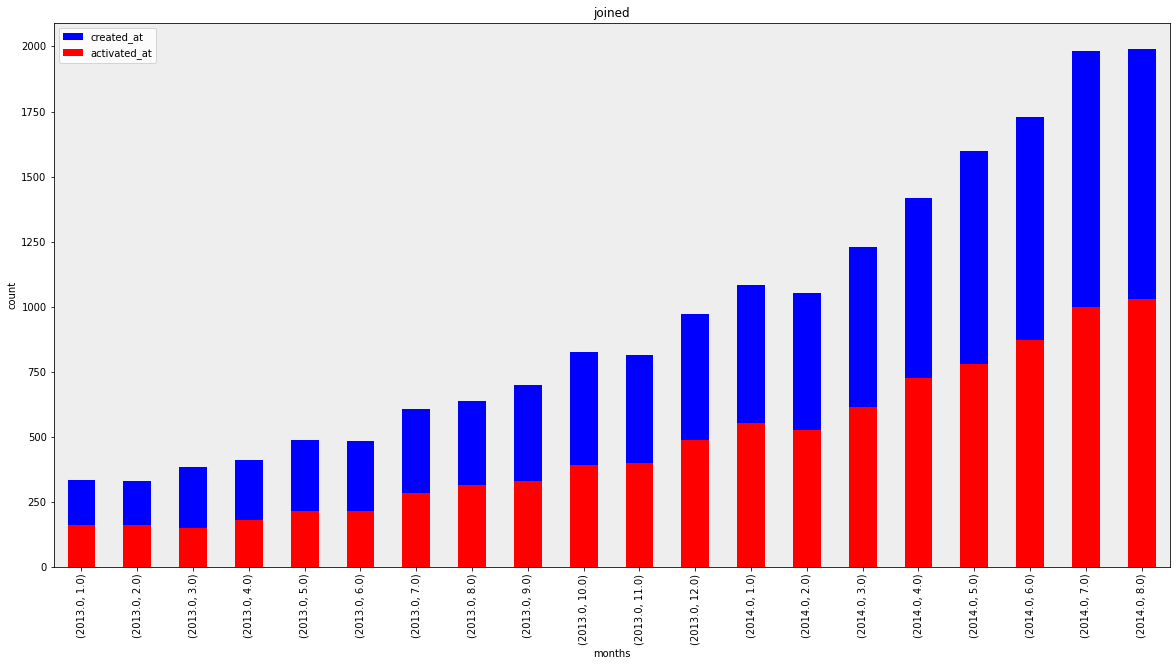

In [123]:
visualize (df = df_users, column_names = ["created_at", "activated_at"], colors=['blue','red'], title="joined")

In [124]:
df_users.groupby(['language']).count()

,user_id,created_at,company_id,activated_at,state
language,,,,,
arabic,768,768,768,365,768
chinese,685,685,685,349,685
english,9585,9585,9585,4773,9585
french,1522,1522,1522,727,1522
german,1067,1067,1067,515,1067
indian,583,583,583,280,583
italian,420,420,420,198,420
japanese,1324,1324,1324,658,1324
korean,270,270,270,142,270


In [125]:
df_users.isna().sum() # no missing values

user_id            0
created_at         0
company_id         0
language           0
activated_at    9685
state              0
dtype: int64

**events**
* event_type: *signup_flow*, *engagement*

In [117]:
df_events = pd.read_csv('yammer_events.csv')
df_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [136]:
df_events['occurred_at'] = pd.to_datetime(df_events['occurred_at'])
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340825 entries, 0 to 340831
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      340825 non-null  float64       
 1   occurred_at  340825 non-null  datetime64[ns]
 2   event_type   340825 non-null  object        
 3   event_name   340825 non-null  object        
 4   location     340825 non-null  object        
 5   device       340825 non-null  object        
 6   user_type    325248 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 20.8+ MB


In [193]:
df_events.isna().sum() # 

user_id            0
occurred_at        0
event_type         0
event_name         0
location           0
device             0
user_type      15577
dtype: int64

In [192]:
df_events['user_type'].unique()

array([ 3.,  1.,  2., nan])

In [127]:
df_events.groupby(["event_type"]).count() # event_types consist mostly of engagement types

,user_id,occurred_at,event_name,location,device,user_type
event_type,,,,,,
engagement,321568,321568,321568,321568,321568,321568
signup_flow,19257,19257,19257,19257,19257,3680


In [195]:
df_engagement = df_events[df_events['event_type'] == 'engagement'] # select only engagement events
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321568 entries, 0 to 340831
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      321568 non-null  float64       
 1   occurred_at  321568 non-null  datetime64[ns]
 2   event_type   321568 non-null  object        
 3   event_name   321568 non-null  object        
 4   location     321568 non-null  object        
 5   device       321568 non-null  object        
 6   user_type    321568 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 19.6+ MB


In [149]:
df_engagement['event_name'].unique()

array(['login', 'home_page', 'like_message', 'view_inbox', 'search_run',
       'send_message', 'search_autocomplete', 'search_click_result_10',
       'search_click_result_7', 'search_click_result_8',
       'search_click_result_1', 'search_click_result_3',
       'search_click_result_2', 'search_click_result_5',
       'search_click_result_6', 'search_click_result_9',
       'search_click_result_4'], dtype=object)

In [150]:
df_engagement['user_type'].unique()

array([3., 1., 2.])

In [155]:
df_engagement.groupby(['user_type']).count()

,user_id,occurred_at,event_type,event_name,location,device
user_type,,,,,,
1.0,209767,209767,209767,209767,209767,209767
2.0,61501,61501,61501,61501,61501,61501
3.0,50300,50300,50300,50300,50300,50300


In [189]:
len(df_engagement['user_id'].unique())

6142

user_id            0
occurred_at        0
event_type         0
event_name         0
location           0
device             0
user_type      15577
dtype: int64

**emails** 
* action: *sent_weekly_digest*, *email_open*, *email_clickthrough*, *sent_reengagement_email*

In [168]:
df_emails = pd.read_csv("yammer_emails.csv")
df_emails["occurred_at"] = pd.to_datetime(df_emails["occurred_at"])
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      90389 non-null  float64       
 1   occurred_at  90389 non-null  datetime64[ns]
 2   action       90389 non-null  object        
 3   user_type    90389 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.8+ MB


In [164]:
df_emails["action"].unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [165]:
df_emails["user_type"].unique()

array([1., 3., 2.])

In [167]:
len(df_emails["user_id"].unique())

6179

**rollup period**

In [181]:
df_rollup = pd.read_csv("dimension_rollup_periods.csv")
df_rollup["time_id"] = pd.to_datetime(df_rollup["time_id"])
df_rollup["pst_start"] = pd.to_datetime(df_rollup["pst_end"])
df_rollup["pst_end"] = pd.to_datetime(df_rollup["pst_end"])
df_rollup["utc_start"] = pd.to_datetime(df_rollup["utc_start"])
df_rollup["utc_end"] = pd.to_datetime(df_rollup["utc_end"])
df_rollup.head()


,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1.0,2013-01-01,2013-01-02,2013-01-02,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1.0,2013-01-02,2013-01-03,2013-01-03,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1.0,2013-01-03,2013-01-04,2013-01-04,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1.0,2013-01-04,2013-01-05,2013-01-05,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1.0,2013-01-05,2013-01-06,2013-01-06,2013-01-05 08:00:00,2013-01-06 08:00:00


### is there a difference in engagement type between June,July, August?


In [210]:
df_engagement.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [209]:
df_engagement["event_name"].value_counts()

home_page                 94065
like_message              59248
view_inbox                55936
login                     38609
send_message              33105
search_autocomplete       17820
search_run                13019
search_click_result_2      1496
search_click_result_1      1412
search_click_result_4      1264
search_click_result_3      1133
search_click_result_5       967
search_click_result_6       805
search_click_result_9       784
search_click_result_7       709
search_click_result_8       690
search_click_result_10      506
Name: event_name, dtype: int64

In [223]:
print(min(df_engagement["occurred_at"]))
print(max(df_engagement["occurred_at"]))

2014-05-01 02:27:15
2014-08-31 23:03:39


In [249]:
event_counts = df_engagement["event_name"].value_counts()

home_page                 94065
like_message              59248
view_inbox                55936
login                     38609
send_message              33105
search_autocomplete       17820
search_run                13019
search_click_result_2      1496
search_click_result_1      1412
search_click_result_4      1264
search_click_result_3      1133
search_click_result_5       967
search_click_result_6       805
search_click_result_9       784
search_click_result_7       709
search_click_result_8       690
search_click_result_10      506
Name: event_name, dtype: int64


In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

### what is different about users who participated in engagement?
was there an error during sign up?

In [201]:
df_signup = df_events[df_events['event_type'] == 'signup_flow']
df_signup.head()
df_signup["event_name"].unique()

array(['create_user', 'enter_email', 'enter_info', 'complete_signup'],
      dtype=object)

so... there are 4 spets to the signup process. what we want to do is to check who are the users who didnt complete signup?

In [ ]:
engaged_user_id = df_engagement['user_id'].unique()
signup_user_id = df_signup['user_id'].unique()